In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tkinter as tk
from tkinter import ttk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [25]:
class LinearRegressionApp:
    def __init__(self,root):
        self.root = root
        self.root.title("Linear Regression Model for Salary Prediction")
        self.root.geometry("1000x600")
        self.df = pd.read_csv('placement.csv')
        self.fig, self.ax = plt.subplots(figsize=(5, 5))
        self.canvas = FigureCanvasTkAgg(self.fig, master=root)
        self.canvas.draw()
        self.canvas.get_tk_widget().pack(side=tk.LEFT, fill=tk.BOTH,expand=1)
        self.create_widgets()
        self.initial_plot()
    def create_widgets(self):
        self.frame_right = tk.Frame(self.root)
        self.frame_right.pack(side=tk.LEFT, padx=20)
        self.label_title = tk.Label(self.frame_right, text="Salary Prediction based on CGPA", font=("Arial", 16))
        self.label_title.pack()
        self.combo_analysis = ttk.Combobox(self.frame_right, values=[
        'Initial Data',
        'First Linear Regression',
        'With Random Feature',
        'With IQ Feature'
])
        self.combo_analysis.pack()
        self.combo_analysis.bind("<<ComboboxSelected>>", self.update_analysis)
        self.label_metrics = tk.Label(self.frame_right, text='Metrics:')
        self.label_metrics.pack()
        self.text_metrics = tk.Text(self.frame_right, width=40, height=15)
        self.text_metrics.pack()
        self.combo_analysis.pack()
        self.combo_analysis.bind("<<ComboboxSelected>>", self.update_analysis)
        self.label_metrics = tk.Label(self.frame_right, text='Metrics:')
        self.label_metrics.pack()
        self.text_metrics = tk.Text(self.frame_right, width=40, height=15)
        self.text_metrics.pack()
    def initial_plot(self):
        self.ax.clear()
        self.ax.scatter(self.df['cgpa'], self.df['package'], color='blue')
        self.ax.set_title('Initial Data')
        self.ax.set_xlabel('CGPA')
        self.ax.set_ylabel('Salary')
        self.canvas.draw()
    def update_analysis(self,event):
        analysis = self.combo_analysis.get()
        if analysis == 'Initial Data':
            self.initial_plot()
            self.text_metrics.delete(1.0, tk.END)
        elif analysis == 'First Linear Regression':
            self.first_linear_regression()
        elif analysis == 'With Random Feature':
            self.with_random_feature()
        elif analysis == 'With IQ Feature':
            self.with_iq_feature()

In [26]:
def first_linear_regression(self):
    X = self.df.iloc[:, 0:1]
    y = self.df.iloc[:, -1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    self.display_metrics(y_test, y_pred, X_test.shape[0], X_test.shape[1])
    self.ax.clear()
    self.ax.scatter(self.df['cgpa'], self.df['package'])
    self.ax.scatter(X_test, y_pred, color='red', label='Predicted')
    self.ax.set_title('First Linear Regression')
    self.ax.set_xlabel('CGPA')
    self.ax.set_ylabel('Salary')
    self.ax.legend()
    self.canvas.draw()

In [27]:
def with_random_feature(self):
    new_df1 = self.df.copy()
    new_df1['random_feature'] = np.random.random(new_df1.shape[0])
    new_df1 = new_df1[['cgpa', 'random_feature', 'package']]
    X = new_df1.iloc[:, 0:2]
    y = new_df1.iloc[:, -1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    self.display_metrics(y_test, y_pred, X_test.shape[0], X_test.shape[1])
    self.ax.clear()
    self.ax.scatter(new_df1['random_feature'], new_df1['package'])
    self.ax.set_xlabel('Random Feature')
    self.ax.set_ylabel('Package (in LPA)')
    self.canvas.draw()

In [28]:
def with_iq_feature(self):
    new_df2 = self.df.copy()
    new_df2['iq'] = new_df2['package'] + (np.random.random(new_df2.shape[0]) * 10)
    new_df2 = new_df2[['cgpa', 'iq', 'package']]
    X = new_df2.iloc[:, 0:2]
    y = new_df2.iloc[:, -1]
    X_train ,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    self.display_metrics(y_test, y_pred, X_test.shape[0], X_test.shape[1])
    self.ax.clear()
    self.ax.scatter(new_df2['iq'], new_df2['package'])
    self.ax.set_xlabel('IQ Feature')
    self.ax.set_ylabel('Package (in LPA)')
    self.canvas.draw()
def display_metrics(self, y_test, y_pred, n ,p):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
    metrics_text = f"MAE: {mae:.2f}\nMSE: {mse:.2f}\nRMSE: {rmse:.2f}\nR²: {r2:.2f}\nAdjusted R²: {adj_r2:.2f}"
    self.text_metrics.delete(1.0, tk.END)
    self.text_metrics.insert(tk.END, metrics_text)

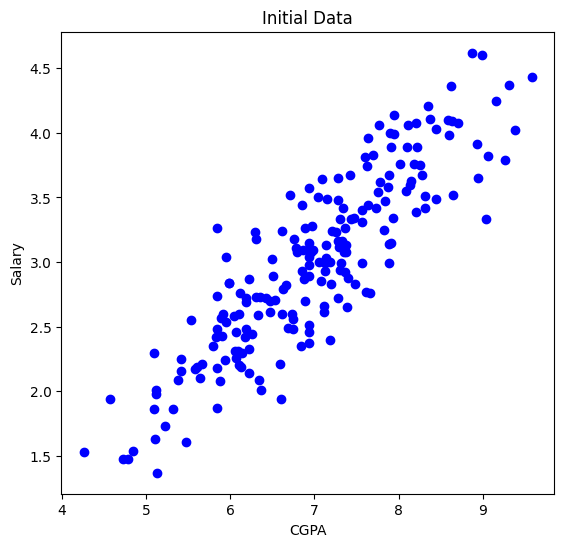

In [29]:
if __name__ == "__main__":
    root = tk.Tk()
    app = LinearRegressionApp(root)
    root.mainloop()